In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df_2021_paid_0 = pd.read_csv('minutes_watched_2021_paid_0.csv')
df_2022_paid_0 = pd.read_csv('minutes_watched_2022_paid_0.csv')
df_2021_paid_1 = pd.read_csv('minutes_watched_2021_paid_1.csv')
df_2022_paid_1 = pd.read_csv('minutes_watched_2022_paid_1.csv')

In [3]:
df_2021_paid_0.shape

(5334, 3)

In [4]:
df_2021_paid_1.shape

(2305, 3)

In [5]:
df_2022_paid_0.shape

(6055, 3)

In [6]:
df_2022_paid_1.shape

(2786, 3)

   student_id  minutes_watched  paid_in_q2
0           9             0.07           0
1          16             2.00           0
2          19             2.45           0
3          20             0.37           0
4          21             0.08           0
   student_id  minutes_watched  paid_in_q2
0           9             0.27           0
1          67            27.03           0
2         144             0.20           0
3         209            14.58           0
4         389             0.15           0
   student_id  minutes_watched  paid_in_q2
0           6            81.03           1
1         516            46.27           1
2         520            91.18           1
3         523          1322.25           1
4         594             3.73           1
   student_id  minutes_watched  paid_in_q2
0           6            67.08           1
1         616           116.02           1
2         618           238.15           1
3         699           222.35           1
4         7

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

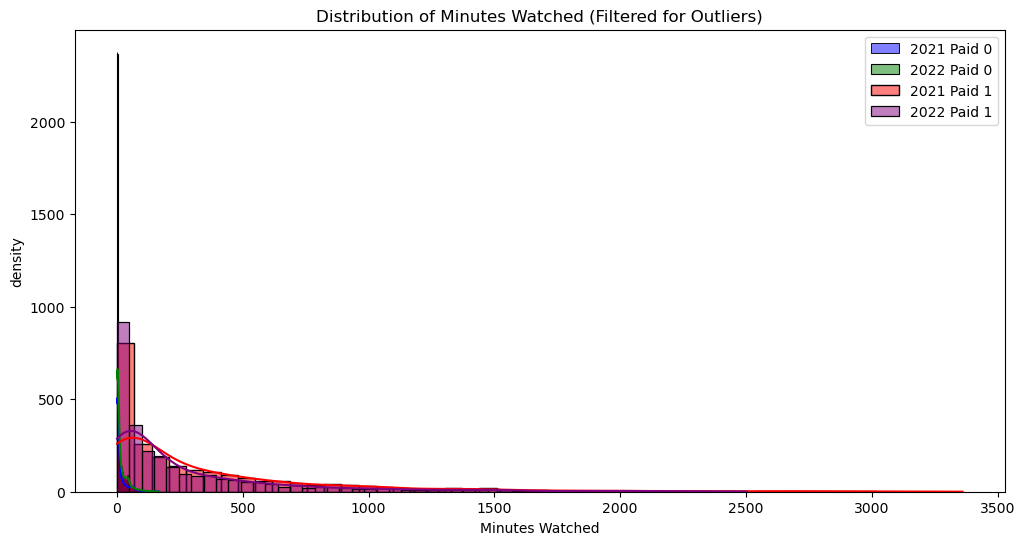

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the datasets
df_2021_paid_0 = pd.read_csv('minutes_watched_2021_paid_0.csv')
df_2022_paid_0 = pd.read_csv('minutes_watched_2022_paid_0.csv')
df_2021_paid_1 = pd.read_csv('minutes_watched_2021_paid_1.csv')
df_2022_paid_1 = pd.read_csv('minutes_watched_2022_paid_1.csv')

# Debugging: Check if DataFrames are loaded correctly
print(df_2021_paid_0.head())  # Check the first few rows of the first dataset
print(df_2022_paid_0.head())  # Check the first few rows of the second dataset
print(df_2021_paid_1.head())  # Check the first few rows of the third dataset
print(df_2022_paid_1.head())  # Check the first few rows of the fourth dataset

# List of datasets
datasets = [df_2021_paid_0, df_2022_paid_0, df_2021_paid_1, df_2022_paid_1]

# Function to remove outliers based on the 99th percentile
def remove_outliers(df):
    if 'minutes_watched' not in df.columns:
        raise ValueError("The dataframe does not contain 'minutes_watched' column.")
    
    # Calculate the 99th percentile
    percentile_99 = df['minutes_watched'].quantile(0.99)
    # Filter the data to remove outliers
    df_filtered = df[df['minutes_watched'] < percentile_99]
    return df_filtered

# Apply the outlier removal to each dataset
filtered_datasets = []
for dataset in datasets:
    try:
        filtered_data = remove_outliers(dataset)
        filtered_datasets.append(filtered_data)
    except Exception as e:
        print(f"Error processing dataset: {e}")

# Visualizing the distributions of filtered data
plt.figure(figsize=(12, 6))
sns.histplot(filtered_datasets[0]['minutes_watched'], kde=True, label='2021 Paid 0', color='blue')
sns.histplot(filtered_datasets[1]['minutes_watched'], kde=True, label='2022 Paid 0', color='green')
sns.histplot(filtered_datasets[2]['minutes_watched'], kde=True, label='2021 Paid 1', color='red')
sns.histplot(filtered_datasets[3]['minutes_watched'], kde=True, label='2022 Paid 1', color='purple')

plt.legend()
plt.title('Distribution of Minutes Watched (Filtered for Outliers)')
plt.xlabel('Minutes Watched')
plt.ylabel('density')
plt.show()


In [13]:
for i,dataset in enumerate(filtered_datasets):
    print(dataset.shape)

(5280, 3)
(5994, 3)
(2281, 3)
(2758, 3)


In [14]:
# Save filtered datasets to new CSV files
filtered_datasets_names = [
    "minutes_watched_2021_paid_0_no_outliers.csv",
    "minutes_watched_2022_paid_0_no_outliers.csv",
    "minutes_watched_2021_paid_1_no_outliers.csv",
    "minutes_watched_2022_paid_1_no_outliers.csv"
]

for filtered_data, name in zip(filtered_datasets, filtered_datasets_names):
    filtered_data.to_csv(name, index=False)
    print(f"Saved filtered dataset to {name}")


Saved filtered dataset to minutes_watched_2021_paid_0_no_outliers.csv
Saved filtered dataset to minutes_watched_2022_paid_0_no_outliers.csv
Saved filtered dataset to minutes_watched_2021_paid_1_no_outliers.csv
Saved filtered dataset to minutes_watched_2022_paid_1_no_outliers.csv


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='minutes_watched', ylabel='Density'>

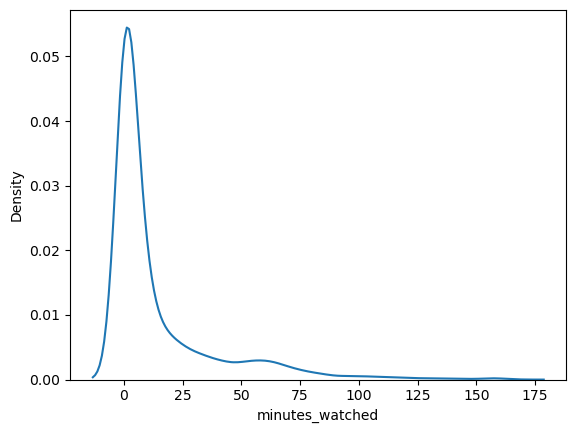

In [16]:
sns.kdeplot(filtered_datasets[0]['minutes_watched'])

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='minutes_watched', ylabel='Density'>

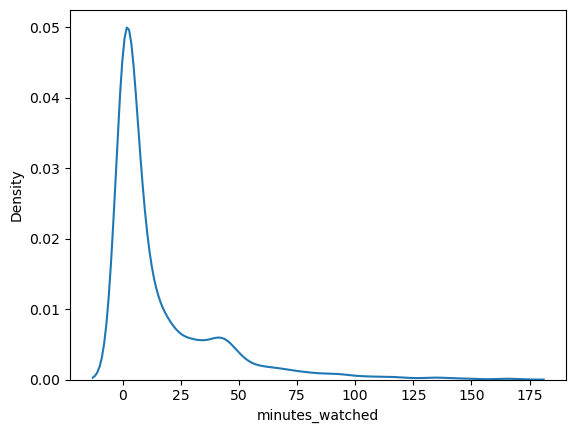

In [17]:
sns.kdeplot(filtered_datasets[1]['minutes_watched'])

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='minutes_watched', ylabel='Density'>

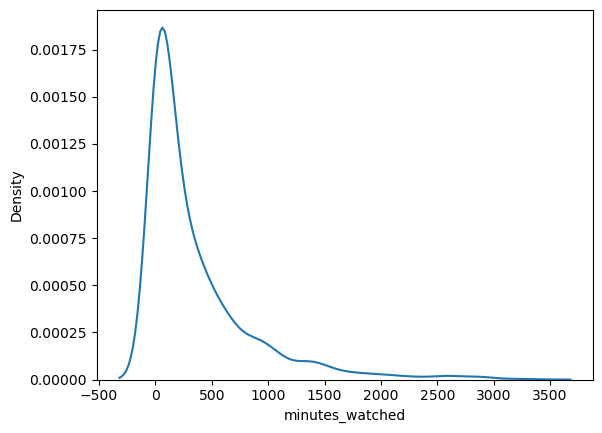

In [18]:
sns.kdeplot(filtered_datasets[2]['minutes_watched'])

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='minutes_watched', ylabel='Density'>

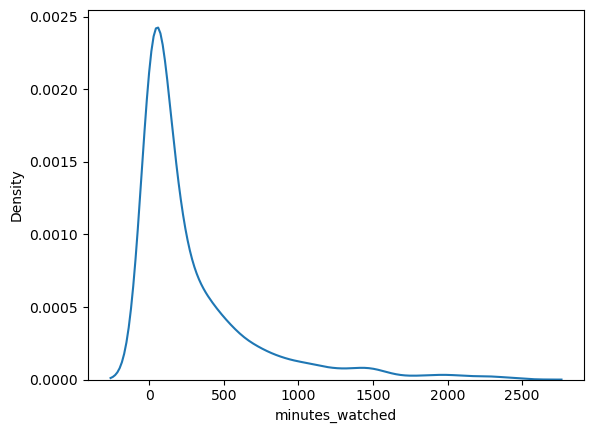

In [19]:
sns.kdeplot(filtered_datasets[3]['minutes_watched'])